# Let's get coding

In [ ]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install pingouin
%pip install statistics
%pip install matplotlib

In [1]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg 
import matplotlib.pyplot as plt
import statistics
from scipy.stats import ttest_rel
from scipy import stats

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)

or 

> Grades were significantly higher for psychology students **(mean = 72.3)** than the average student **(mean = 67.5) (t(19) = 2.25, p < 0.05)** 

## Dataset 1: Moon and aggression


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Moon%20and%20Aggression.csv')
df



,Moon,Other
0,3.33,0.27
1,3.67,0.59
2,2.67,0.32
3,3.33,0.19
4,3.33,1.26
5,3.67,0.11
6,4.67,0.30
7,2.67,0.40
8,6.00,1.59
9,4.33,0.60


In [5]:
# defining group 1 and 2

group1 = df['Moon'] 
group2 = df['Other']


In [6]:
# performing the appropriate t-test

test1 = pg.ttest(group1, group2, paired = True)

test1

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.451789,14,two-sided,0.000015,"[1.62, 3.24]",2.200516,1521.058,1.0


In [7]:
test2 = ttest_rel(group1, group2, alternative = 'two-sided')
test2

Ttest_relResult(statistic=6.451788554357532, pvalue=1.5181521009727053e-05)

In [8]:
# reporting the results

m1 = np.mean(group1).round(3)
m2 = np.mean(group2).round(3)

dof = 14
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Disruptive behaviors were significantly more frequent during the full moon periods (mean = {m1}) that during other periods (mean = {m2}) (t({dof}) = {t}, p = {p})")


Disruptive behaviors were significantly more frequent during the full moon periods (mean = 3.022) that during other periods (mean = 0.589) (t(14) = 6.452, p = 0.0)


In [9]:
# plotting the results

moon_df = pd.melt(df)
moon_df.head(30)

,variable,value
0,Moon,3.33
1,Moon,3.67
2,Moon,2.67
3,Moon,3.33
4,Moon,3.33
5,Moon,3.67
6,Moon,4.67
7,Moon,2.67
8,Moon,6.00
9,Moon,4.33


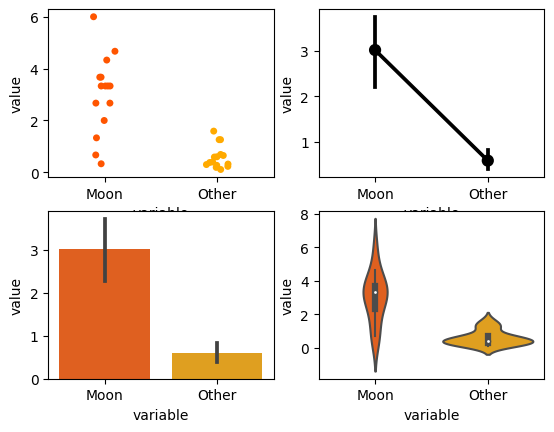

In [12]:
fig, axes = plt.subplots(2,2)

sns.stripplot(data = moon_df, x = 'variable', y = 'value', ax = axes[0,0], palette = "autumn")

sns.pointplot(data = moon_df, x = 'variable', y = 'value', ax = axes[0,1], color = 'black')

sns.barplot(data = moon_df, x = 'variable', y = 'value', ax = axes[1,0], palette = "autumn")

sns.violinplot(data = moon_df, x = 'variable', y = 'value', ax = axes[1,1], palette = "autumn")

plt.show()

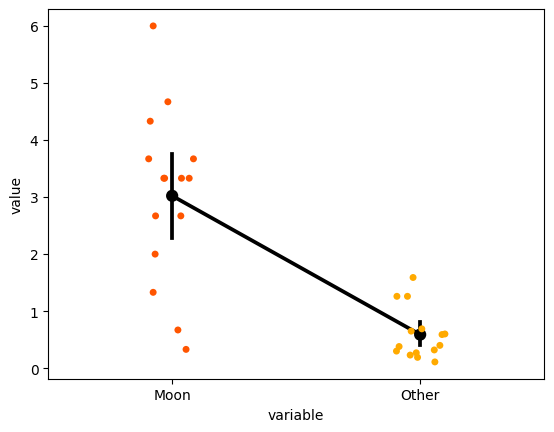

In [13]:
fig, axes = plt.subplots(1)

sns.stripplot(data = moon_df, x = 'variable', y = 'value', ax = axes, palette = "autumn")

sns.pointplot(data = moon_df, x = 'variable', y = 'value', ax = axes, color = 'black')

plt.show()

## Dataset 2: Eye movements and word recall

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Eye%20Movements.csv')

df.head(10)

,ParticipantNumber,Condition,CriticalRecall
0,1,Horizontal,4
1,3,Fixation,14
2,4,Horizontal,12
3,6,Fixation,4
4,7,Horizontal,11
5,9,Fixation,23
6,10,Horizontal,16
7,12,Fixation,22
8,13,Horizontal,9
9,15,Fixation,16


In [15]:
# group1 and group2
group1 = df.loc[df['Condition'] == 'Horizontal']
group2 = df.loc[df['Condition'] == 'Fixation']

group2.head()

,ParticipantNumber,Condition,CriticalRecall
1,3,Fixation,14
3,6,Fixation,4
5,9,Fixation,23
7,12,Fixation,22
9,15,Fixation,16


In [16]:
# pingouin test

test1 = pg.ttest(group1['CriticalRecall'], group2['CriticalRecall'],
                alternative = 'greater')
test1

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.823413,40.268769,greater,0.996324,"[-7.04, inf]",0.813105,0.077,0.000004


In [17]:
# scipy

test2 = stats.ttest_ind(group1['CriticalRecall'], group2['CriticalRecall'], 
                        equal_var = False, alternative = 'greater')

test2

Ttest_indResult(statistic=-2.8234133654901394, pvalue=0.9963242482081401)

In [18]:
# reporting the results

m1 = np.mean(group1['CriticalRecall']).round(3)
m2 = np.mean(group2['CriticalRecall']).round(3)

dof = df.shape[0] - 2
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Critical recall in the Horizontal condition was not significantly higher (mean = {m1}) that in the Fixation condition (mean = {m2}) (t({dof}) = {t}, p = {p})")



Critical recall in the Horizontal condition was not significantly higher (mean = 10.88) that in the Fixation condition (mean = 15.292) (t(47) = -2.823, p = 0.996)


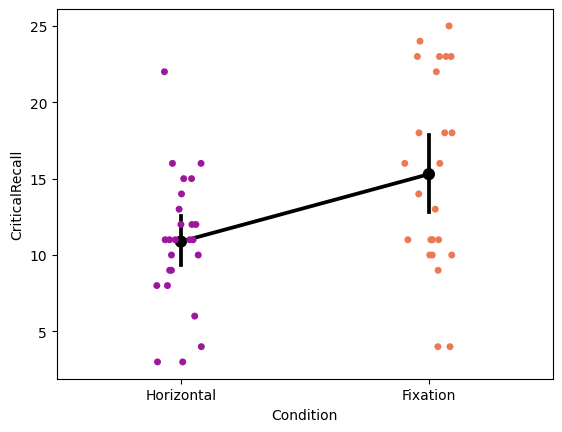

In [19]:
# plotting

fig, axes = plt.subplots(1)

sns.stripplot(data = df, x = 'Condition', y = 'CriticalRecall', ax = axes, palette = "plasma")

sns.pointplot(data = df, x = 'Condition', y = 'CriticalRecall', ax = axes, color = 'black')

plt.show()

## Dataset 3: Jeans 

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/university_of_florida/bluejeans_laser.csv')

df.head(5)

,method,jeanid,sampleid,strength,extension
0,1,1,1,1266,68.06
1,1,2,1,1099,61.54
2,1,3,1,1068,40.48
3,1,4,1,1266,59.83
4,1,5,1,968,55.89


In [23]:
# group 1 and group2

group1 = df.loc[df['method'] == 1] # manual
group2 = df.loc[df['method'] == 2] # laser

group2.head()

,method,jeanid,sampleid,strength,extension
20,2,21,1,1279,75.52
21,2,22,1,1197,71.44
22,2,23,1,1083,44.16
23,2,24,1,1418,70.56
24,2,25,1,1273,69.13


In [30]:
# strength

# pingouin
test1 = pg.ttest(group1['strength'], group2['strength'])
test1

test2 = stats.ttest_ind(group1['strength'], group2['strength'], equal_var = False)
test2

# reporting

m1 = np.mean(group1['strength']).round(3)
m2 = np.mean(group2['strength']).round(3)

dof = df.shape[0] - 2
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Jeans strength was significantly lower with the manual method (mean = {m1}) that with the laser method (mean = {m2}) (t({dof}) = {t}, p = {p})")

# print(m1 ,m2)


Jeans strength was significantly lower with the manual method (mean = 1067.433) that with the laser method (mean = 1273.283) (t(118) = -12.803, p = 0.0)


In [31]:
# extension

# pingouin
test1 = pg.ttest(group1['extension'], group2['extension'])
test1

#scipy
test2 = stats.ttest_ind(group1['extension'], group2['extension'], equal_var = False)
test2

# reporting

m1 = np.mean(group1['extension']).round(3)
m2 = np.mean(group2['extension']).round(3)

dof = df.shape[0] - 2
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Jeans extension was significantly lower with the manual method (mean = {m1}) that with the laser method (mean = {m2}) (t({dof}) = {t}, p = {p})")

# print(m1 ,m2)

Jeans extension was significantly lower with the manual method (mean = 65.06) that with the laser method (mean = 71.343) (t(118) = -4.264, p = 0.0)


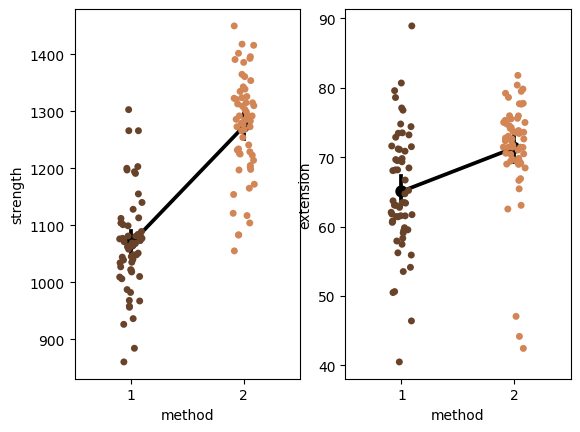

In [33]:
fig, axes = plt.subplots(1,2)

sns.stripplot(data = df, x = 'method', y = 'strength', ax = axes[0], palette = "copper")

sns.pointplot(data = df, x = 'method', y = 'strength', ax = axes[0], color = 'black')

sns.pointplot(data = df, x = 'method', y = 'extension', ax = axes[1], color = 'black')

sns.stripplot(data = df, x = 'method', y = 'extension', ax = axes[1], palette = "copper")



plt.show()

## Dataset 4: Crime in the USA

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/sheffield_MASH/crime.csv')

df.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [35]:
group1 = df.loc[df['Southern'] == 0] # northern
group2 = df.loc[df['Southern'] == 1] # southern

group2.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
10,79.8,142,1,12.9,45,533,969,0,18,94,...,44,552,969,0,19,93,36,0,378,247
14,85.6,166,1,11.4,58,521,973,0,46,72,...,54,543,983,0,47,76,25,1,568,246
19,96.8,151,1,10.0,58,510,950,0,33,108,...,56,515,1001,1,32,110,40,0,465,254


In [38]:
# pingouin
test1 = pg.ttest(group1['CrimeRate'], group2['CrimeRate'])

# scipy
test2 = stats.ttest_ind(group1['CrimeRate'], group2['CrimeRate'], equal_var = False)
test2

Ttest_indResult(statistic=0.4005489620244038, pvalue=0.6908611786450152)

In [39]:
# reporting
m1 = np.mean(group1['CrimeRate']).round(3)
m2 = np.mean(group2['CrimeRate']).round(3)

dof = df.shape[0] - 2
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Crime rate did not significantly differ between northern states (mean = {m1}) and southern states (mean = {m2}) (t({dof}) = {t}, p = {p})")



Crime rate did not significantly differ between northern states (mean = 103.906) and southern states (mean = 100.681) (t(45) = 0.401, p = 0.691)


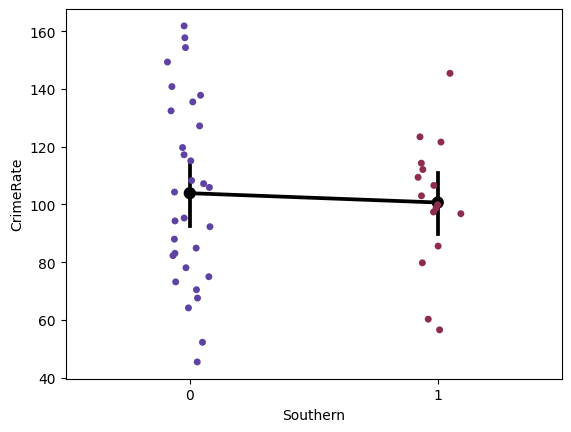

In [40]:
# plotting

fig, axes = plt.subplots(1)

sns.stripplot(data = df, x = 'Southern', y = 'CrimeRate', ax = axes, palette = "twilight")

sns.pointplot(data = df, x = 'Southern', y = 'CrimeRate', ax = axes, color = 'black')

plt.show()